<a href="https://colab.research.google.com/github/chrislee973/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
# YOUR WORK HERE
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

--2020-09-08 18:12:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.07s   

2020-09-08 18:12:35 (307 KB/s) - ‘student.zip’ saved [20478/20478]



In [2]:
!unzip student.zip


Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [39]:
df = pd.read_csv('student-mat.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


In [11]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [101]:
#Determine whether 'school' and 'sex' are associated with one another

school_sex = pd.crosstab(df['school'], df['sex'])
school_sex


sex,F,M
school,,
GP,183,166
MS,25,21


In [13]:
g, p, dof, expctd = chi2_contingency(school_sex)
p

0.9305999299762074

**Because we have an extremely large p-value (.93), we fail to reject the null hypothesis and thus conclude that the 'school' and 'sex' variables are independent of one another.**

In [106]:
school_sex = school_sex.stack().reset_index().rename(columns ={ 0:'value'})
school_sex

,school,sex,value
0,GP,F,183
1,GP,M,166
2,MS,F,25
3,MS,M,21


Text(0, 0.5, 'Count')

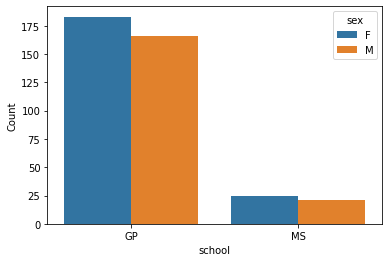

In [107]:
#Chart school_sex
#school_sex = school_sex.stack().reset_index()
sns.barplot(x=school_sex['school'], y = school_sex['value'], hue=school_sex['sex'] )
plt.ylabel('Count')

In [68]:
sex_studytime = pd.crosstab(df['sex'], df['studytime'])
sex_studytime

studytime,1,2,3,4
sex,,,,
F,27,113,51,17
M,78,85,14,10


In [69]:
g, p, dof, expctd = chi2_contingency(sex_studytime)
p

5.854045926336989e-11

**With a p-value of 5.8e-11 being so small, we are confident in rejecting the null hypothesis and concluding that there is a statistically significant relationship between 'sex' and 'studytime'.**

In [76]:
#Find all variable pairs that are related to one another to a statistically significant degree (ie p-value <=.05)

from itertools import combinations

#List of all paired combinations of variables
var_combos = combinations(df.columns, 2)

for combo in var_combos: 
  var1, var2 = combo
  cross_tab = pd.crosstab(df[var1], df[var2])
  g, p, dof, expctd = chi2_contingency(cross_tab)
  if p <= .05: 
    print(f"The variable {var1} and {var2} are correlated with one another with p-value of {p}")

The variable school and age are correlated with one another with p-value of 2.8253973276676154e-13
The variable school and address are correlated with one another with p-value of 7.77068354957483e-08
The variable school and Medu are correlated with one another with p-value of 0.00031360912544192357
The variable school and reason are correlated with one another with p-value of 0.005947834009263454
The variable school and traveltime are correlated with one another with p-value of 6.183726050805027e-07
The variable school and schoolsup are correlated with one another with p-value of 0.010947927561620895
The variable school and famsup are correlated with one another with p-value of 0.0018229547960183089
The variable school and activities are correlated with one another with p-value of 0.030207061533005782
The variable school and internet are correlated with one another with p-value of 0.014502273089578969
The variable school and Dalc are correlated with one another with p-value of 0.026392

In [81]:
#Find all variable pairs that are NOT related to one another to a statistically significant degree (ie p-value >=.05)
from itertools import combinations

#List of all paired combinations of variables
var_combos = combinations(df.columns, 2)

for combo in var_combos: 
  var1, var2 = combo
  cross_tab = pd.crosstab(df[var1], df[var2])
  g, p, dof, expctd = chi2_contingency(cross_tab)
  if p >= .05: 
    print(f"The variable {var1} and {var2} are NOT correlated with one another with p-value of {p}")

The variable school and sex are NOT correlated with one another with p-value of 0.9305999299762074
The variable school and famsize are NOT correlated with one another with p-value of 0.2643824405188475
The variable school and Pstatus are NOT correlated with one another with p-value of 0.5121068929609607
The variable school and Fedu are NOT correlated with one another with p-value of 0.3202894872283391
The variable school and Mjob are NOT correlated with one another with p-value of 0.3912110411805535
The variable school and Fjob are NOT correlated with one another with p-value of 0.07761918184541579
The variable school and guardian are NOT correlated with one another with p-value of 0.31178571472966304
The variable school and studytime are NOT correlated with one another with p-value of 0.17486544862841863
The variable school and failures are NOT correlated with one another with p-value of 0.36852229909951695
The variable school and paid are NOT correlated with one another with p-value 

### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [ ]:
# YOUR WORK HERE



### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

- What are hypothesis test? How are they useful?

- What is a "null hypothesis?"

- What is a p-value and what does it represent?

- What does it mean for something to be "statistically significant?"

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)